In [1]:
#Importing  required Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# importing trianiing and testing data
df_train=pd.read_csv("trainmalignant.csv")
df_test = pd.read_csv("testmalignant.csv")
df_train.head()


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
print("The no. of Rows in dataset is: ",df_train.shape[0],"and no. of columns is ",df_train.shape[1])

The no. of Rows in dataset is:  159571 and no. of columns is  8


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:
df_train.describe()


,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# droping unnecessary column
df_train.drop("id",axis=1,inplace=True)

<AxesSubplot:xlabel='malignant', ylabel='count'>

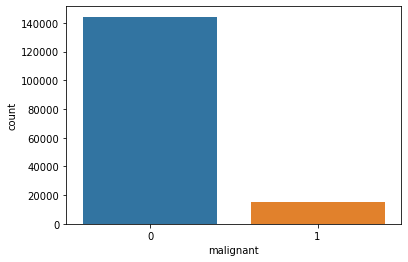

In [8]:
sns.countplot(df_train["malignant"])

we see very low probability of comment being malignant

<AxesSubplot:xlabel='highly_malignant', ylabel='count'>

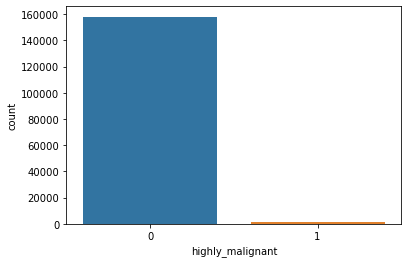

In [9]:
sns.countplot(df_train["highly_malignant"])

we see very low probability of comment being malignant

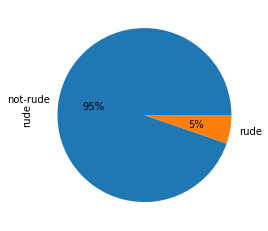

In [11]:
df_train["rude"].value_counts().plot.pie(labels=["not-rude", "rude"], autopct="%1.0f%%")
plt.show()

we see very low probability of comment being malignant

<AxesSubplot:xlabel='threat', ylabel='count'>

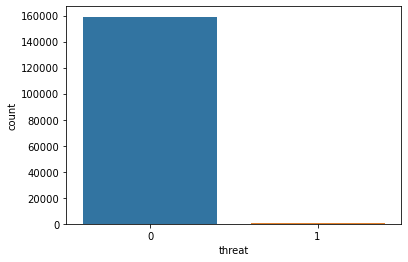

In [12]:
sns.countplot(df_train["threat"])

we see very low probability of comment being malignant

<AxesSubplot:xlabel='abuse', ylabel='count'>

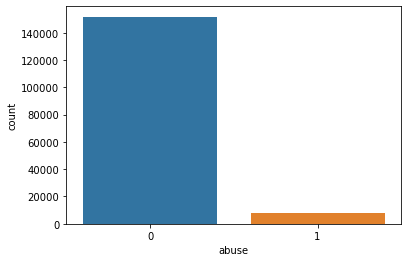

In [13]:
sns.countplot(df_train["abuse"])

we see very low probability of comment being malignant

<AxesSubplot:xlabel='loathe', ylabel='count'>

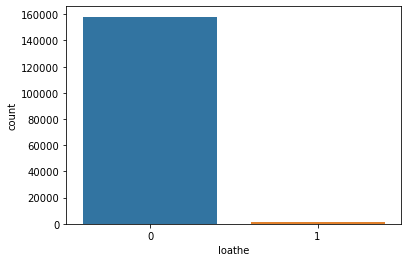

In [14]:
sns.countplot(df_train["loathe"])

we see very low probability of comment being malignant

While maximum Categories belong to Malignant, a lot of comments are abusive and rude as well; while threat comments are the minimum

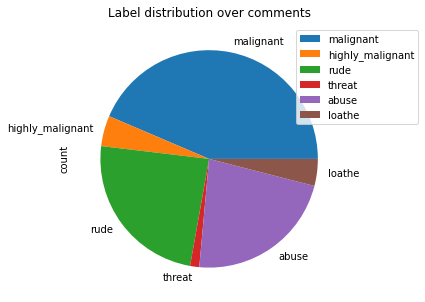

In [15]:
#checking how which comment fall under which category
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_plot = df_train[cols_target].sum().to_frame().rename(columns={0: 'count'})
df_plot.plot.pie(y='count',title='Label distribution over comments',figsize=(5, 5)).legend(loc='center left', bbox_to_anchor=(0.8, 0.8))

<AxesSubplot:>

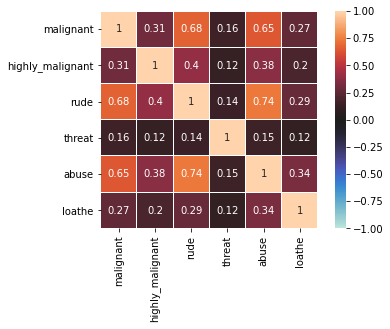

In [17]:
sns.heatmap(df_train.corr(),vmin=-1,vmax=1,annot=True,square=True,center=0,linewidths=.1)

In [18]:
df_train.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [19]:
#Checking the percentage of the comments
none = df_train[(df_train['malignant']!=1) & (df_train['highly_malignant']!=1) & (df_train['rude']!=1) & 
                            (df_train['threat']!=1) & (df_train['abuse']!=1) & (df_train['loathe']!=1)]
percent=len(none)/len(df_train)*100
print('Percentage of good/neutral comments = ',percent)
print('Percentage of negative comments = ', (100-percent))

Percentage of good/neutral comments =  89.83211235124176
Percentage of negative comments =  10.167887648758239


We can see that there are more good/neutral comments rather than negative comments

In [20]:
#Storing the number of counts for every target label
counts=df_train.iloc[:,2:].sum()
counts

highly_malignant    1595
rude                8449
threat               478
abuse               7877
loathe              1405
dtype: int64

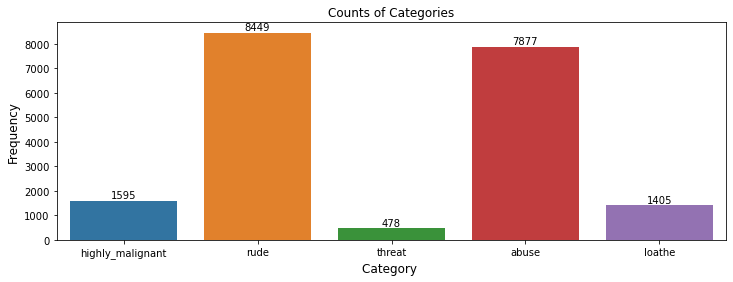

In [21]:
#Plotting the counts of each category
plt.figure(figsize=(12,4))
ax = sns.barplot(counts.index, counts.values)
plt.title("Counts of Categories")
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Category ', fontsize=12)
rects = ax.patches
labels = counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

Rude comments are the highest among all whereas threat comments are very less. highly-magligant and loathe comments are also present more

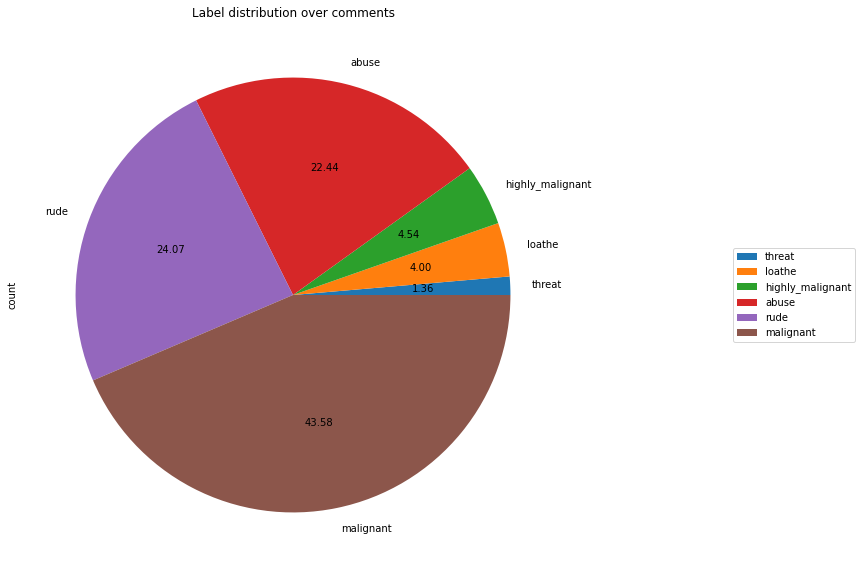

In [22]:
#Visualizing the label distribution of comments using pie chart
comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
df_distribution = df_train[comments_labels].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y = 'count', title = 'Label distribution over comments', autopct='%.2f', figsize = (10, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

<AxesSubplot:xlabel='comment_text', ylabel='Density'>

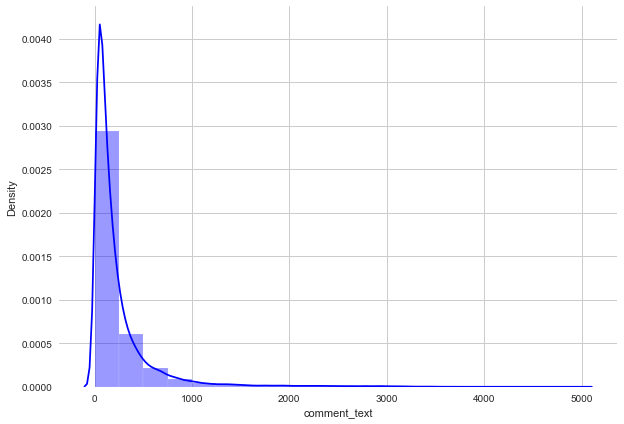

In [114]:
#Distribution of comments length
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
comment_len = df_train.comment_text.str.len()
sns.distplot(comment_len, bins=20, color = 'blue')

Above is a plot showing the comment length frequency. As noticed, most of the comments are short with only a few comments longer than 1000 words. Majority of the comments are of length 500, where maximum length is 5000 and minimum length is 5. Median length being 250.

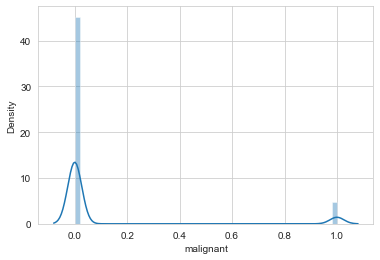

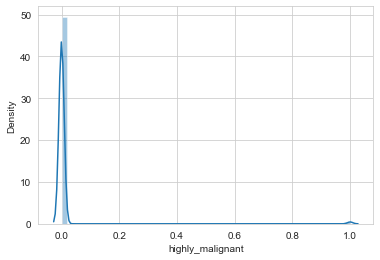

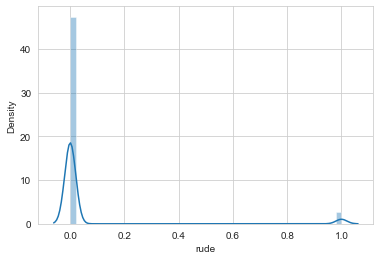

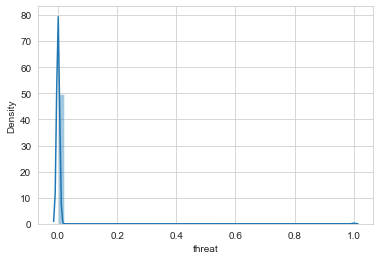

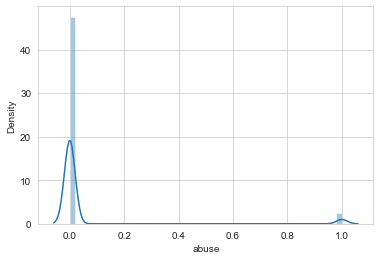

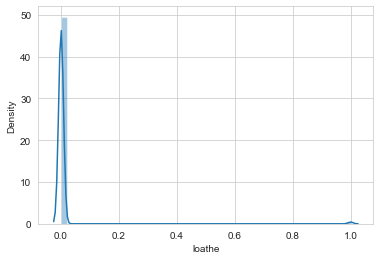

In [24]:
#Plotting distplot for checking the distribution of data
for col in df_train.describe().columns:
    sns.distplot(df_train[col])
    plt.show()

In [26]:
df_train.describe()    #Statistical summary of the dataset

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The minimum value and the maximum value of the attributes is same i.e., 0 and 1 respectively. The mean and standard deviation is nearly 0-1 of all the attributes in the training dataset. Here, with this statistical analysis, it is interpreted that there are no outliers as well as skewness present in this training dataset. The count of each field is equal which shows that there are no missing values present.

In [27]:
#Checking correlation of the dataset
corr=df_train.corr()  #corr() function provides the correlation value of each column
corr

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


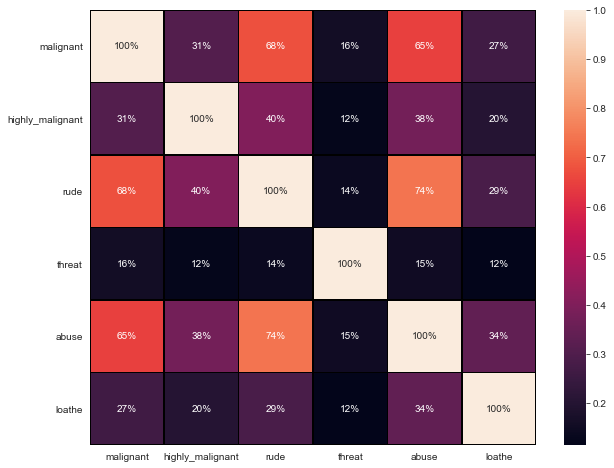

In [29]:
#Plotting heatmap for visualizing the correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr,linewidth=0.5,linecolor='black',fmt='.0%',annot=True)
plt.show()

The highest positive correlation is seen in between fields 'rude' and 'abuse'.

Attribute 'threat' is negatively correlated with each and every other feature of this training dataset.

Overall the correlation among the attributes is not positive.

# Data pre-processing

In [30]:
#Creating a 'label' column in the train dataset
#Label column is the sum of all the target features
comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
df_train[comments_labels].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [31]:
df_train['label']=df_train[comments_labels].sum(axis=1)
df_train.head(10)  #Checking the dataset after adding it

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


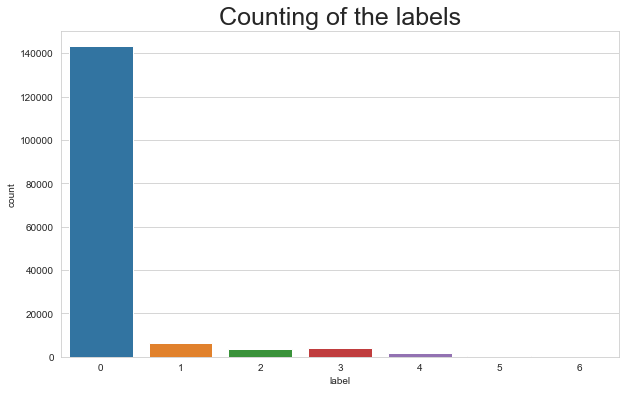

In [33]:
#Checking the count of labels
plt.figure(figsize=(10,6))
sns.countplot(df_train['label'])
plt.title('Counting of the labels',fontsize=25)
plt.show()

In [34]:
df_train['label'].value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: label, dtype: int64

We can see that 0 has more number of weightage, whereas 6 has the lesser weightage

In [35]:
#Scaling the label column
df_train['label'] = df_train['label'] >0
df_train['label'] = df_train['label'].astype(int)
df_train.head(15)    #Checking the data after scaling

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


0    143346
1     16225
Name: label, dtype: int64


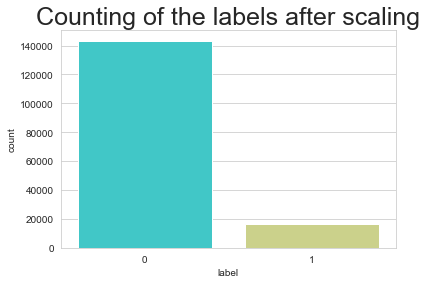

In [38]:
#Checking the counting of labels after scaling
print(df_train['label'].value_counts())
sns.countplot(df_train['label'], palette='rainbow')
plt.title('Counting of the labels after scaling',fontsize=25)
plt.show()

After scaling the data, we can see that 0 has more weightage and 1 has lesser weightage

In [39]:
#Creating a column 'length_before_cleaning' in training dataset
#It represents the length of the each comment respectively in a column 'comment_text' 
df_train['length_before_cleaning'] = df_train['comment_text'].map(lambda comment_text: len(comment_text))
df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,116


In [41]:
#Creating a column 'length_before_cleaning' in test dataset
#It represents the length of the each comment respectively in a column 'comment_text' 
df_test['length_before_cleaning'] = df_test['comment_text'].map(lambda comment_text: len(comment_text))
df_test


,id,comment_text,length_before_cleaning
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,00017563c3f7919a,":If you have a look back at the source, the in...",205
4,00017695ad8997eb,I don't anonymously edit articles at all.,41
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",60
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,198
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",423
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",502


# Preprocessing using NLP

In [42]:
!pip install wordcloud

In [43]:
!pip install nltk

In [44]:
#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\jaspreet
[nltk_data]     rathod\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [46]:
#Defining the stop words
stop_words = stopwords.words('english')

#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [47]:
#Replacing '\n' in comment_text
df_train['comment_text'] = df_train['comment_text'].replace('\n',' ')

In [48]:
#Function Definition for using regex operations and other text preprocessing for getting cleaned texts
def clean_comments(text):
    
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [49]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\jaspreet
[nltk_data]     rathod\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to C:\Users\jaspreet
[nltk_data]     rathod\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [50]:
#Calling the above function for the column comment_text in training dataset to replace original with cleaned text
df_train['comment_text'] = df_train['comment_text'].apply(clean_comments)
df_train['comment_text']

0         explanation edits made username hardcore metal...
1         aww match background colour seemingly stuck th...
2         hey man really trying edit war guy constantly ...
3         make real suggestion improvement wondered sect...
4                             sir hero chance remember page
                                ...                        
159566    second time asking view completely contradicts...
159567                 ashamed horrible thing put talk page
159568    spitzer umm there actual article prostitution ...
159569    look like actually put speedy first version de...
159570    really think understand came idea bad right aw...
Name: comment_text, Length: 159571, dtype: object

In [51]:
#Creating a column 'len_after_cleaning'
#Representing the length of the each comment respectively in a column 'comment_text' after cleaning the text.
df_train['len_after_cleaning'] = df_train['comment_text'].map(lambda comment_text: len(comment_text))
df_train

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,264,156
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0,112,67
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0,622,364
4,sir hero chance remember page,0,0,0,0,0,0,0,67,29
...,...,...,...,...,...,...,...,...,...,...
159566,second time asking view completely contradicts...,0,0,0,0,0,0,0,295,178
159567,ashamed horrible thing put talk page,0,0,0,0,0,0,0,99,36
159568,spitzer umm there actual article prostitution ...,0,0,0,0,0,0,0,81,65
159569,look like actually put speedy first version de...,0,0,0,0,0,0,0,116,56


We can see that nearly half of the text has been removed from the comment_text after using required pre-processing

In [52]:
#Checking Total length removal in train dataset
print("Original Length:", df_train.length_before_cleaning.sum())
print("Cleaned Length:", df_train.len_after_cleaning.sum())
print("Total Words Removed:", (df_train.length_before_cleaning.sum()) - (df_train.len_after_cleaning.sum()))

Original Length: 62893130
Cleaned Length: 38474840
Total Words Removed: 24418290


In [53]:
#Calling the above function for the column comment_text in test dataset so that we can replace original with cleaned text
df_test['comment_text'] = df_test['comment_text'].apply(clean_comments)
df_test['comment_text']

0         yo bitch ja rule succesful ever whats hating s...
1                                        rfc title fine imo
2                                source zawe ashton lapland
3         look back source information updated correct f...
4                                  anonymously edit article
                                ...                        
153159                totally agree stuff nothing long crap
153160    throw field home plate get faster throwing cut...
153161    okinotorishima category see change agree corre...
153162    one founding nation eu germany law return quit...
153163    stop already bullshit welcome fool think kind ...
Name: comment_text, Length: 153164, dtype: object

In [54]:
#Creating a column 'len_after_cleaning'
#It represents the length of the each comment respectively in a column 'comment_text' after cleaning the text
df_test['len_after_cleaning'] = df_test['comment_text'].map(lambda comment_text: len(comment_text))
df_test

,id,comment_text,length_before_cleaning,len_after_cleaning
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,367,235
1,0000247867823ef7,rfc title fine imo,50,18
2,00013b17ad220c46,source zawe ashton lapland,54,26
3,00017563c3f7919a,look back source information updated correct f...,205,109
4,00017695ad8997eb,anonymously edit article,41,24
...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap,60,37
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...,198,107
153161,fffda9e8d6fafa9e,okinotorishima category see change agree corre...,423,238
153162,fffe8f1340a79fc2,one founding nation eu germany law return quit...,502,319


In [55]:
#Total length removal in test dataset
print('Original Length:',df_test.length_before_cleaning.sum())
print('Clean Length:',df_test.len_after_cleaning.sum())
print("Total Words Removed:", (df_test.length_before_cleaning.sum()) - (df_test.len_after_cleaning.sum()))

Original Length: 55885733
Clean Length: 34282033
Total Words Removed: 21603700


In [56]:
df_malignant=df_train[(df_train['malignant']==1)]
df_malignant

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
6,cocksucker piss around work,1,1,1,0,1,0,1,44,27
12,hey talk exclusive group wp taliban good destr...,1,0,0,0,0,0,1,319,197
16,bye look come think comming back tosser,1,0,0,0,0,0,1,57,39
42,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648,394
43,fuck filthy mother as dry,1,0,1,0,1,0,1,40,25
...,...,...,...,...,...,...,...,...,...,...
159494,previous conversation fucking shit eating libe...,1,0,1,0,1,1,1,1677,1053
159514,mischievious pubic hair,1,0,0,0,1,0,1,33,23
159541,absurd edits absurd edits great white shark to...,1,0,1,0,1,0,1,346,213
159546,hey listen ever delete edits ever annoyed wwe ...,1,0,0,0,1,0,1,534,268


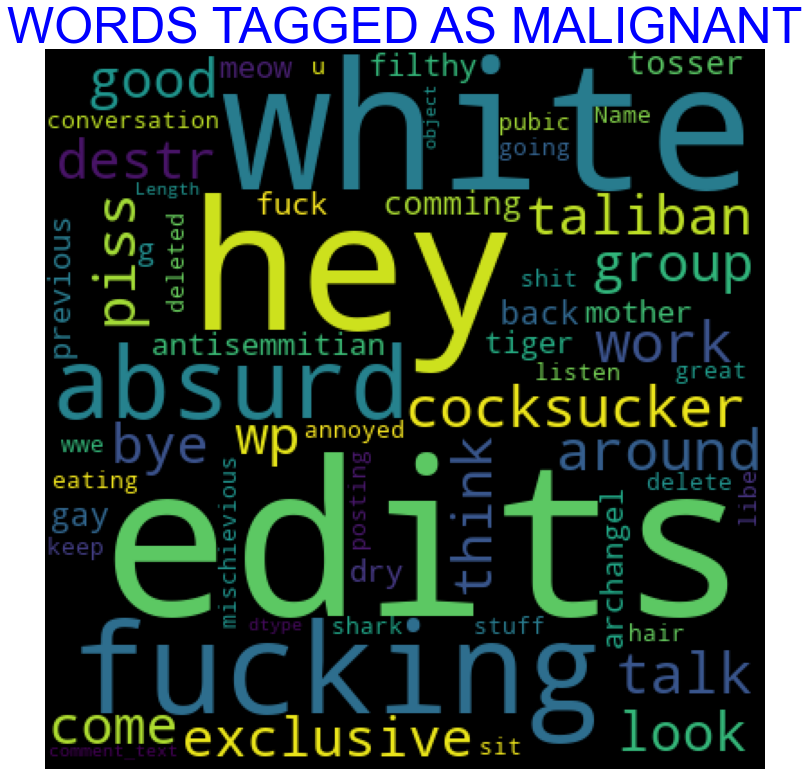

In [60]:
#Plotting for malignant
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_malignant['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS MALIGNANT',fontdict={'fontsize':50, 'fontweight':50, 'color':'blue'})
plt.show()


In [61]:
df_highlymalignant=df_train[(df_train['highly_malignant']==1)]
df_highlymalignant

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
6,cocksucker piss around work,1,1,1,0,1,0,1,44,27
55,stupid peace shit stop deleting stuff asshole ...,1,1,1,0,1,0,1,89,70
181,stupid fuck mother cunt stink,1,1,1,0,1,0,1,53,29
442,hi im fucking bitch,1,1,1,0,1,0,1,40,19
579,motherfucking piece crap fuckhead blocking u,1,1,1,0,1,0,1,67,44
...,...,...,...,...,...,...,...,...,...,...
159096,filthy stinking crow back dirty crow better de...,1,1,1,0,1,0,1,251,168
159099,fucking pathetic moron cc jimbo wale rootmyass,1,1,1,0,1,0,1,62,46
159281,lol gay never know good feel fuck woman as,1,1,1,0,1,1,1,87,42
159312,walter mercado antonio quite frankly fucker co...,1,1,1,0,1,0,1,192,137


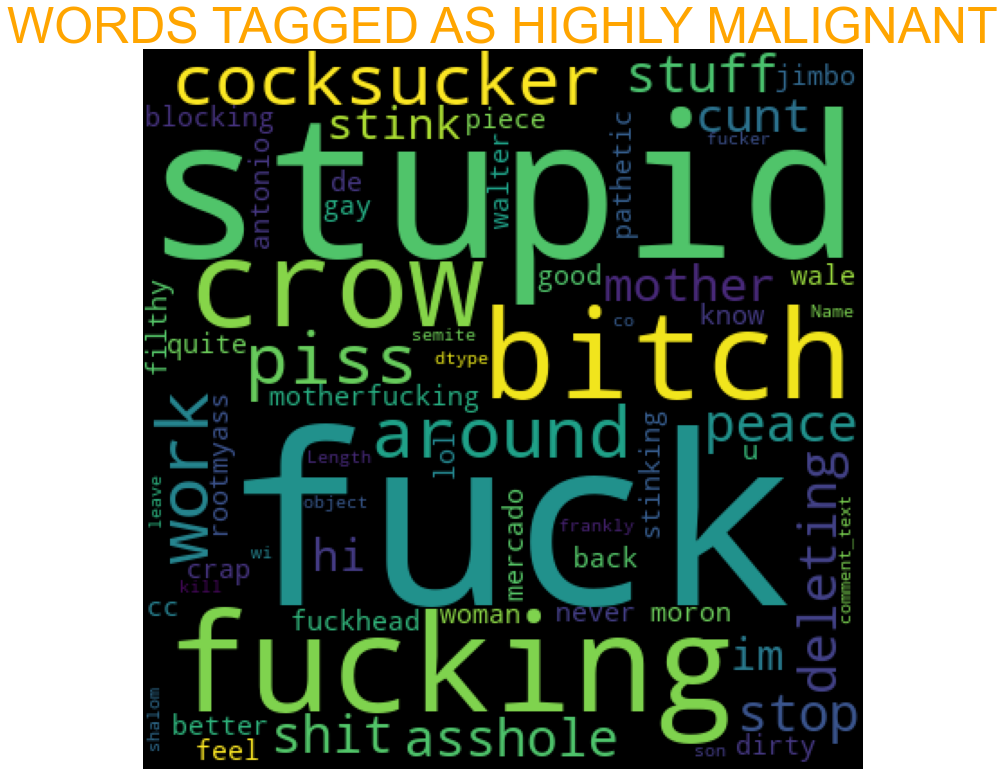

In [62]:
#Plotting for highly_malignant
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_highlymalignant['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS HIGHLY MALIGNANT',fontdict={'fontsize':50, 'fontweight':50, 'color':'orange'})
plt.show()

In [63]:
df_rude=df_train[(df_train['rude']==1)]
df_rude

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
6,cocksucker piss around work,1,1,1,0,1,0,1,44,27
42,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648,394
43,fuck filthy mother as dry,1,0,1,0,1,0,1,40,25
51,get fucked get fuckeeed got drink cant put get...,1,0,1,0,0,0,1,124,75
55,stupid peace shit stop deleting stuff asshole ...,1,1,1,0,1,0,1,89,70
...,...,...,...,...,...,...,...,...,...,...
159411,fat piece shit obese piece shit thought naked ...,1,0,1,0,1,0,1,91,65
159493,fucking faggot lolwat,1,0,1,0,1,0,1,24,21
159494,previous conversation fucking shit eating libe...,1,0,1,0,1,1,1,1677,1053
159541,absurd edits absurd edits great white shark to...,1,0,1,0,1,0,1,346,213


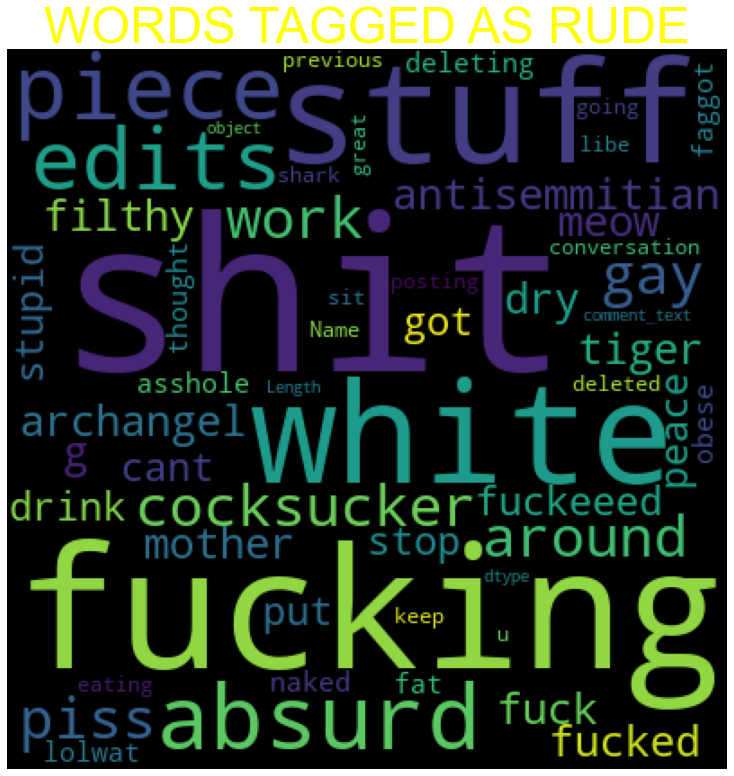

In [65]:
#Plotting for rude
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_rude['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS RUDE',fontdict={'fontsize':50, 'fontweight':50, 'color':'yellow'})
plt.show()

In [66]:
df_threat=df_train[(df_train['threat']==1)]
df_threat


,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
79,hi back last warning stop undoing edits die,1,0,0,1,0,0,1,64,43
176,think fagget get oife burn hell hate sorry can...,1,0,1,1,1,1,1,128,68
600,also sock puppet account suprise sincerely man...,1,0,0,1,0,0,1,138,66
802,fuck smith please notified die want dance grave,1,0,1,1,1,0,1,85,47
1017,first time bitch fuck find live sodomize wife ...,1,1,1,1,1,1,1,150,75
...,...,...,...,...,...,...,...,...,...,...
157718,bitch fucking hore suck dick big as hole gay f...,1,0,1,1,1,1,1,316,195
158717,stupid head dumb stupid die die die go suck butt,1,0,1,1,1,0,1,69,48
158856,hey hey faggot dead yet watching mom getting r...,1,1,1,1,1,0,1,212,124
159029,death musulmans,1,0,0,1,0,1,1,19,15


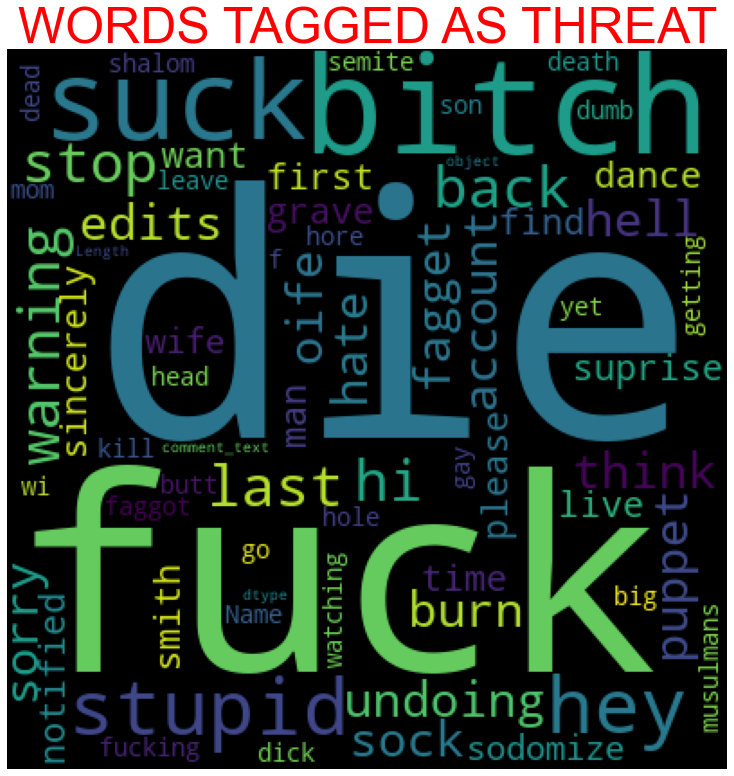

In [67]:
#Plotting for threat
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_threat['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS THREAT',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [70]:
df_abuse=df_train[(df_train['abuse']==1)]
df_abuse


,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
6,cocksucker piss around work,1,1,1,0,1,0,1,44,27
42,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648,394
43,fuck filthy mother as dry,1,0,1,0,1,0,1,40,25
55,stupid peace shit stop deleting stuff asshole ...,1,1,1,0,1,0,1,89,70
56,tony sidaway obviously fistfuckee love arm as,1,0,1,0,1,0,1,68,45
...,...,...,...,...,...,...,...,...,...,...
159494,previous conversation fucking shit eating libe...,1,0,1,0,1,1,1,1677,1053
159514,mischievious pubic hair,1,0,0,0,1,0,1,33,23
159541,absurd edits absurd edits great white shark to...,1,0,1,0,1,0,1,346,213
159546,hey listen ever delete edits ever annoyed wwe ...,1,0,0,0,1,0,1,534,268


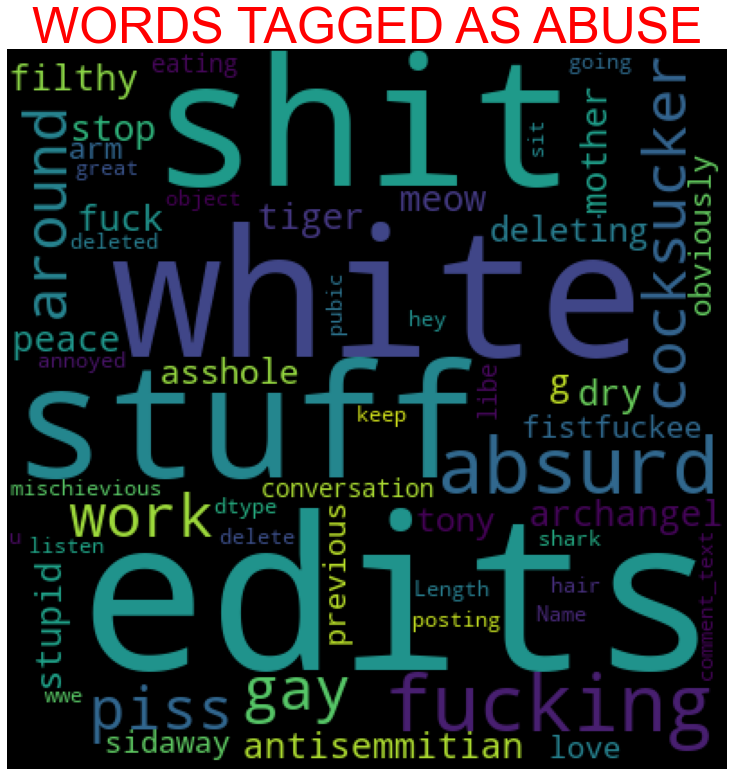

In [71]:
#Plotting for abuse
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_abuse['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS ABUSE',fontdict={'fontsize':50, 'fontweight':50, 'color':'red'})
plt.show()

In [72]:
df_loathe=df_train[(df_train['loathe']==1)]
df_loathe

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,len_after_cleaning
42,gay antisemmitian archangel white tiger meow g...,1,0,1,0,1,1,1,648,394
105,pair jew hating weiner nazi schmuck,1,0,1,0,1,1,1,42,35
176,think fagget get oife burn hell hate sorry can...,1,0,1,1,1,1,1,128,68
218,kill nigger hard others said included racist s...,1,0,1,0,1,1,1,120,58
238,u r tw fuck u gay boy u r smelly fuck ur mum p...,1,0,1,0,1,1,1,58,51
...,...,...,...,...,...,...,...,...,...,...
159281,lol gay never know good feel fuck woman as,1,1,1,0,1,1,1,87,42
159336,oh fuck pansy jew would whine b nai brith beat...,1,0,1,0,1,1,1,110,64
159400,shalom semite get fuck kill son bitch leave wi...,1,1,1,1,1,1,1,474,265
159449,think gay fag,1,0,0,0,0,1,1,26,13


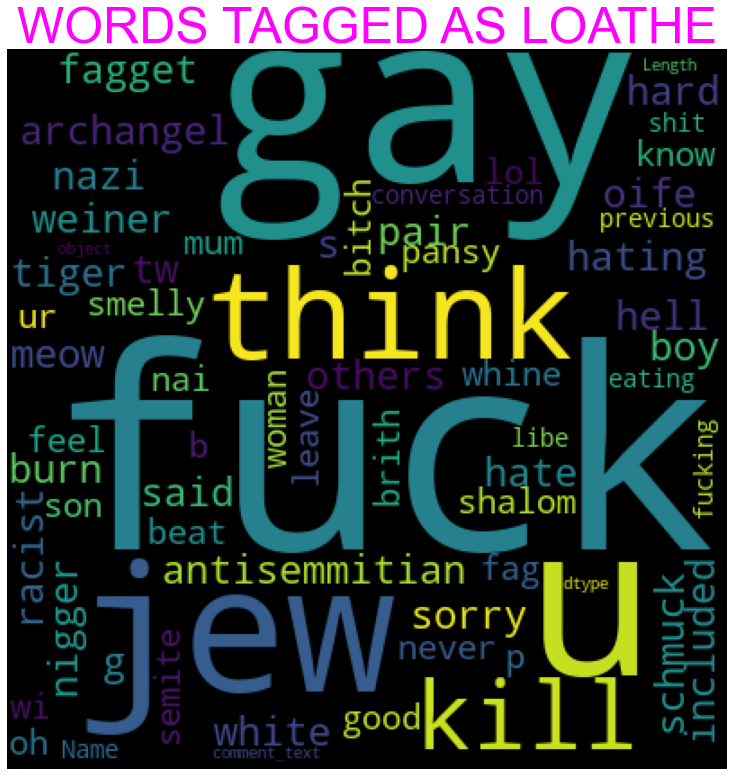

In [73]:
#Plotting for loathe
wordcloud=WordCloud(height=400,width=400,max_words=400).generate(str(df_loathe['comment_text']))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS LOATHE',fontdict={'fontsize':50, 'fontweight':50, 'color':'magenta'})
plt.show()


From the above wordclouds, we can see that the large texts have more weightage in their respective type of comments whereas small texts have the lesser weightages

# Separating independent and dependent variables

In [74]:
#Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features = 15000, stop_words='english')

In [75]:
#Let's Separate the input and output variables represented by X and y respectively in train data and convert them
X = tf_vec.fit_transform(df_train['comment_text'])

In [76]:
y=df_train['label']

In [77]:
print(X.shape,'\t\t', y.shape)    #Checking the shape of the data

(159571, 15000) 		 (159571,)


In [78]:
#Doing the above process for test data 
test_vec = tf_vec.fit_transform(df_test['comment_text'])
test_vec

<153164x15000 sparse matrix of type '<class 'numpy.float64'>'
	with 2870432 stored elements in Compressed Sparse Row format>

In [79]:
test_vec.shape

(153164, 15000)

# Building the model

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

In [81]:
#using tfidf vectorizer to convert text into vector as our machine learning model only understands numerical value
tf= TfidfVectorizer()
features = tf.fit_transform(df_train["comment_text"])
x= features
y= df_train["label"]

In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=70)

# LogisticRegression

In [83]:
lr= LogisticRegression()
lr.fit(x_train,y_train)

y_pred= lr.predict(x_test)

In [84]:
print("\nClassification report :\n",classification_report(y_test,y_pred))


Classification report :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     35857
           1       0.94      0.61      0.74      4036

    accuracy                           0.96     39893
   macro avg       0.95      0.80      0.86     39893
weighted avg       0.96      0.96      0.95     39893



In [85]:
a=accuracy_score(y_test,y_pred)
c=cross_val_score(lr,x,y,cv=3).mean()
loss = log_loss(y_test,y_pred)
print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)

accuracy_score :  0.9563331912866919 
 cross validation score : 0.954315005813238 
 logloss: 1.5082014692579615


In [86]:
confusion_matrix(y_test,y_pred)

array([[35691,   166],
       [ 1576,  2460]], dtype=int64)

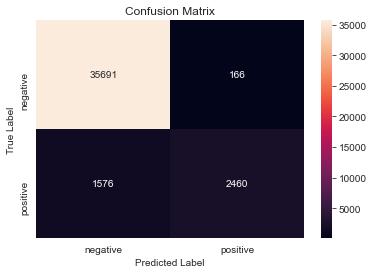

In [87]:
conf_mat = confusion_matrix(y_test, y_pred)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [88]:
accuracy = []
cross_val = []
diff = []
logloss=[]
accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)

In [89]:
model = ["LogisticRegression"]

In [90]:
classifier = pd.DataFrame({"MODEL":model,"Accuracy score":accuracy,"Cross_validation_Score":cross_val,"Difference":diff,"Logloss":logloss})

classifier

,MODEL,Accuracy score,Cross_validation_Score,Difference,Logloss
0,LogisticRegression,0.956333,0.954315,0.002018,1.508201


logistic is my best model as it is showing least difference in cv and accuracy score and i have done add the regression but it was not showing in my pc it is taking hours to tun the model.

hyperparameter tuning

In [92]:
from sklearn.model_selection import RandomizedSearchCV
param =      {'warm_start':[True,False],
            'dual':[True,False],
              'random_state':[50,70,100]}

In [96]:
rand_search = RandomizedSearchCV(lr,param_distributions=param,cv=4)

In [97]:
rand_search.fit(x_train,y_train)

RandomizedSearchCV(cv=4, estimator=LogisticRegression(),
                   param_distributions={'dual': [True, False],
                                        'random_state': [50, 70, 100],
                                        'warm_start': [True, False]})

In [ ]:
rand_search.best_params_

In [98]:
lr= LogisticRegression(warm_start=False,random_state=50,dual=False)
lr.fit(x_train,y_train)

y_pred1= lr.predict(x_test)

In [99]:
print(" Accuracy score :",accuracy_score(y_test,y_pred1),"\n","="*80,"\n Cross_validation_Score :",
      cross_val_score(lr,x,y,cv=3).mean(),"\n","="*80,"\n Classification report :\n",classification_report(y_test,y_pred1),
     "="*80,"\n Confusion matrix :\n",confusion_matrix(y_test,y_pred1))

 Accuracy score : 0.9563331912866919 
 Cross_validation_Score : 0.954315005813238 
 Classification report :
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     35857
           1       0.94      0.61      0.74      4036

    accuracy                           0.96     39893
   macro avg       0.95      0.80      0.86     39893
weighted avg       0.96      0.96      0.95     39893
 Confusion matrix :
 [[35691   166]
 [ 1576  2460]]


In [100]:
log_loss(y_test,y_pred1)

1.5082014692579615

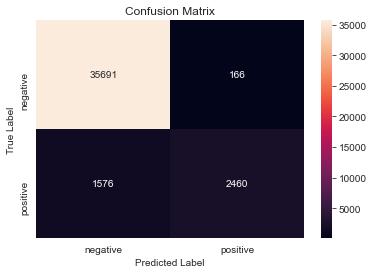

In [101]:
conf_mat = confusion_matrix(y_test, y_pred1)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [102]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve

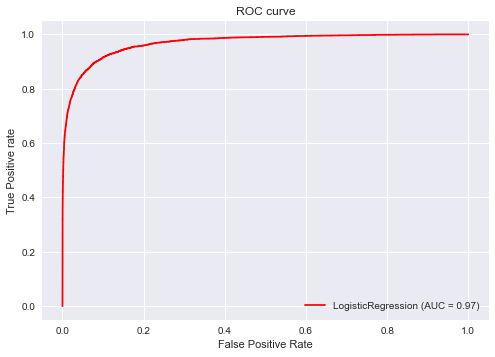

In [103]:
plt.style.use('seaborn')

disp = plot_roc_curve(lr,x_test,y_test,color='red')

plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)


# saving model

In [105]:
import pickle
pickle.dump(lr,open("comment.pk1","wb"))

In [106]:
load_model = pickle.load(open("comment.pk1","rb"))

verifying model on testing data

In [107]:
testing_data = tf.transform(df_test["comment_text"])

In [108]:
a=lr.predict(testing_data)

In [109]:
pd.DataFrame(a)

,0
0,1
1,0
2,0
3,0
4,0
...,...
153159,1
153160,0
153161,0
153162,0


In [111]:
df_test["label"]=a

In [112]:
df_test

,id,comment_text,length_before_cleaning,len_after_cleaning,label
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,367,235,1
1,0000247867823ef7,rfc title fine imo,50,18,0
2,00013b17ad220c46,source zawe ashton lapland,54,26,0
3,00017563c3f7919a,look back source information updated correct f...,205,109,0
4,00017695ad8997eb,anonymously edit article,41,24,0
...,...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap,60,37,1
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...,198,107,0
153161,fffda9e8d6fafa9e,okinotorishima category see change agree corre...,423,238,0
153162,fffe8f1340a79fc2,one founding nation eu germany law return quit...,502,319,0


In [113]:
df_test.to_csv("test.csv")